In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
data = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Temp\fac2f7d9-e57e-4b99-bd54-a4b9a3586329.xlsx')

In [27]:
pattern = r'\+{0,1}7\(9\d{2}\).+'
pattern2 = r'\+{0,1}79\d{2}.+'

def prov(x):
    if re.match(pattern, str(x)) or re.match(pattern2, str(x)):
        return True
    else:
        return False
    


In [28]:
data['format'] = data['Телефон мобильный'].apply(prov)

In [33]:
data_operators = data[data['format'] == True].reset_index()

In [36]:
data_operators = data_operators.loc[:, ['Номер карты', 'Телефон мобильный', 'Год']]

In [51]:
pattern3 = r'\+{0,1}7\({0,1}(9\d{2})\){0,1}.+'

In [52]:
def prefix(x):
    if re.search(pattern3, str(x)):
        return re.search(pattern3, str(x)).group(1)
    else:
        return False

In [59]:
data_operators['pref'] = data_operators['Телефон мобильный'].apply(prefix).apply(str)

In [60]:
data_operators

,Номер карты,Телефон мобильный,Год,pref
0,120010433{дублирование карт},+7(911)764-04-88,2018,911
1,120010433{дублирование карт},+7(911)764-04-88,2019,911
2,120010433{дублирование карт},+7(911)764-04-88,2020,911
3,120048530{дублирование карт},+7(921)573-61-01,2018,921
4,120048530{дублирование карт},+7(921)573-61-01,2020,921
...,...,...,...,...
572505,990503437,+7(921)303-98-03,2020,921
572506,990503467,+7(952)221-79-15,2020,952
572507,990503752,+7(911)090-60-88,2020,911
572508,990504084,+7(917)858-48-15,2020,917


In [57]:
operator_pref = pd.read_excel('oper.xlsx')

In [62]:
operator_pref.pref = operator_pref.pref.apply(str)

In [71]:
dct = operator_pref.to_dict('index')

In [73]:
dct2 = {}
cnt = 0
x = ''
for key, val in dct.items():
    cnt = 0
    for key1, val1 in val.items():
        cnt += 1
        if cnt == 1:
            x = val1
            dct2.setdefault(x, '')
        else:
            dct2[x] = val1
    

In [75]:
def oper(x):
    for key, val in dct2.items():
        if x in val:
            return key

In [76]:
data_operators['operator'] = data_operators.pref.apply(oper)

In [91]:
data_operators

,Номер карты,Телефон мобильный,Год,pref
0,120010433{дублирование карт},+7(911)764-04-88,2018,911
1,120010433{дублирование карт},+7(911)764-04-88,2019,911
2,120010433{дублирование карт},+7(911)764-04-88,2020,911
3,120048530{дублирование карт},+7(921)573-61-01,2018,921
4,120048530{дублирование карт},+7(921)573-61-01,2020,921
...,...,...,...,...
572505,990503437,+7(921)303-98-03,2020,921
572506,990503467,+7(952)221-79-15,2020,952
572507,990503752,+7(911)090-60-88,2020,911
572508,990504084,+7(917)858-48-15,2020,917


In [83]:
data_operators.drop('operator', axis=1, inplace=True)

In [85]:
operator_pref = pd.read_excel('oper2.xlsx')

In [90]:
operator_pref.pref = operator_pref.pref.apply(str)

In [93]:
data_operators = data_operators.merge(operator_pref, how='left')

In [99]:
data_group_operators = data_operators.groupby(['Год', 'oper']).agg({'Телефон мобильный' : 'count'})

In [103]:
data_group_operators.columns = ['Кол-во телефонов']

In [111]:
data_group_operators.to_excel('monile_operators.xlsx')

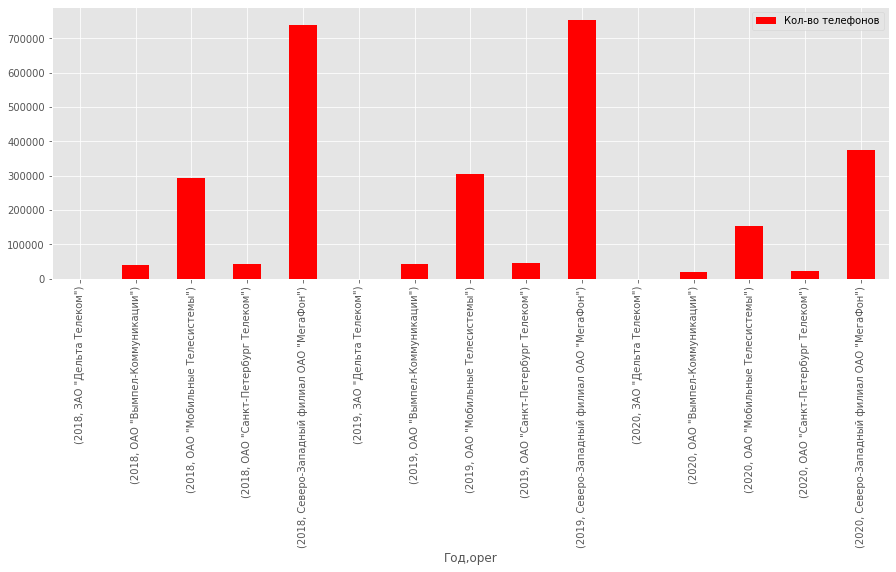

In [110]:
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок
data_group_operators.plot.bar(color='red')

KeyboardInterrupt: 

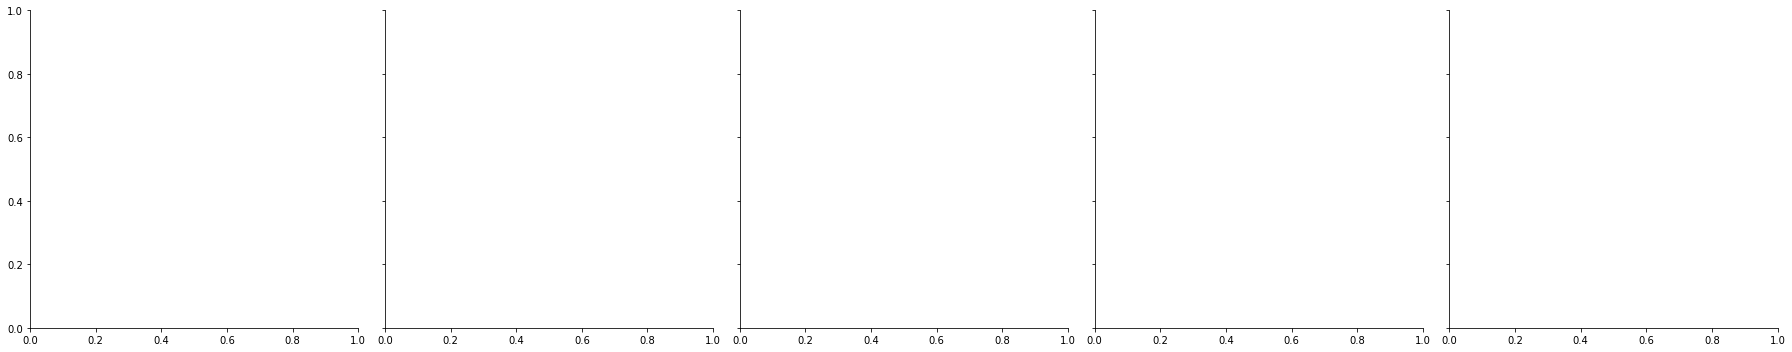

In [109]:
import seaborn as sns

sns.catplot(x='Год', y='Телефон мобильный', col='oper', data=data_operators, kind='bar')